<table>
    <tr>
        <td><img src="./img/Macc.png" width="auto"/></td>
        <td>
            <table><tr>
            <h1 style="color:#5973d4;text-align:center">Lógica para Ciencias de la Computación</h1></td>
            </tr></table>   
        <td>&nbsp;</td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Segunda entrega</p></tp>
            <tp><p style="font-size:150%;text-align:center">Proyecto</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

# Problema de las N damas - Grupo 7 <a class="anchor" id="inicio"></a>

## Integrantes

1. Mateo Puente
2. Santiago Diaz
3. Daniel Moreno

## Objetivo

El objetivo de este notebook es representar el problema de las 8 damas haciendo uso de lógica proposicional.


# Secciones

1. [Descripción del problema.](#prob)
2. [Descriptores.](#des)
3. [Implementación de restricciones.](#imp)

# Descripción del problema <a class="anchor" id="prob"></a>

([Volver al inicio](#inicio))

El problema de las $n$ damas consiste en ubicar $n$ damas en un tablero de $n \cdot n$ sin que se ataquen.

Para representar el problema tenemos que tener en cuenta 4 reglas:

1. No puede haber más de una reina por fila.
2. No puede haber más de una reina por columna.
3. No puede haber más de una reina por diagonal (Tanto hacia arriba como hacia hacia abajo).
4. Debe haber $n$ reinas en el tablero.


# Descriptores <a class="anchor" id="des"></a>

([Volver al inicio](#inicio))

Debemos primero representar las letras proposicionales, las cuales cruzan la información sobre la posición de una reina en alguna casilla:

$ReinaEN(x,y)$ es verdadera si y sólo si una reina está en la casilla $(x,y)$, con $x, y ∈ [0, n]$

Para hacer la implementación en python, usamos la clase `Descriptor`, que se encuentra en la librería `Logica`.

Importamos la clase a partir de la librería:

In [1]:
from tree_less_logic import *
from Queens import *
super_important_function_that_every_project_needs()


  ／l、             
（ﾟ､ ｡ ７         
  l  ~ヽ       
  じしf_,)ノ        



Ahora creamos un descriptor de dos argumentos para la casilla $(x,y)$

In [2]:
n = 4
reinas = Reinas(n)
ReinaEn = reinas.Reina_En_Casilla

Building regla4...
regla4 built successfully


### Codificando en un solo caracter

Mediante el método P() podemos crear las codificaciones. A continuación presentaremos cada uno de los caracteres que codifican los cruces de $(x,y)$, con $x, y ∈ [0, n]$ :

In [3]:
for x in range(n):
    for y in range(n):
        letra = reinas.Reina_En_Casilla.ravel([x, y])

        print(f"La reina está en {x, y} es la letra: {letra}")

La reina está en (0, 0) es la letra: Ā
La reina está en (0, 1) es la letra: Ą
La reina está en (0, 2) es la letra: Ĉ
La reina está en (0, 3) es la letra: Č
La reina está en (1, 0) es la letra: ā
La reina está en (1, 1) es la letra: ą
La reina está en (1, 2) es la letra: ĉ
La reina está en (1, 3) es la letra: č
La reina está en (2, 0) es la letra: Ă
La reina está en (2, 1) es la letra: Ć
La reina está en (2, 2) es la letra: Ċ
La reina está en (2, 3) es la letra: Ď
La reina está en (3, 0) es la letra: ă
La reina está en (3, 1) es la letra: ć
La reina está en (3, 2) es la letra: ċ
La reina está en (3, 3) es la letra: ď


### Decodificando el caracter

Ahora podemos incluir un método para visualizar más fácilmente la información que porta cada letra proposicional. Esto es, en nuestro ejemplo en cuestión, nuestro objeto `ReinaEN` representa el cruce de información de que una reina se encuentra en un lugar. Entonces, al decodificar una letra proposicional, queremos que nos presente claramente esta información y no un caracter inpronunciable (aunque es precisamente este caracter el que usará la máquina).

Para ello podemos usar el siguiente método `escribir`:

In [4]:
letra = reinas.Reina_En_Casilla.ravel([1, 0])

reinas.Reina_En_Casilla.escribir(letra)

' Hay una reina en la casilla (1,0)'

Este método también toma en cuenta si el literal es positivo o negativo:

In [5]:
reinas.Reina_En_Casilla.escribir('-' + letra)

'No hay una reina en la casilla (1,0)'

# Implementación de restricciones <a class="anchor" id="imp"></a>

([Volver al inicio](#inicio))

Ahora es necesario crear las reglas que limitarán los valores de verdad para las letras proposicionales. En nuestro problema tenemos cuatro restricciones:

1. No puede haber más de una reina por columna.
2. No puede haber más de una reina por fila.
3. No puede haber más de una reina por diagonal (Tanto hacia arriba como hacia hacia abajo).
4. Debe haber $n$ reinas en el tablero.

## Regla 1

Comencemos por considerar la restricción 1, que dice que no puede haber más de una reina por columna:

$$\bigwedge_{x\in\ Columnas}\bigwedge_{y\in Filas}\left(ReinaEn(x, y)\implies\neg\left(\bigvee_{u \neq y} ReinaEN(x,u)\right)\right)$$

Saber cómo implementar toda esta fórmula de un solo tirón, con itorias y otorias anidadas, no es fácil. Desarrollaremos esta implementación siguiendo una serie de pasos, cada uno con mayor generalidad que el anterior.

### Paso 1

La fórmula para representar que si una reina está en la casilla $(0,0)$, entonces no puede estar en el resto de la columna 0, es la siguiente:

$$ReinaEN(0, 0) \implies \neg\left(\bigvee_{u\in Columnas - \{ 0\}} ReinaEN(0,u)\right)$$

Esta fórmula se implementa en Python de la siguiente manera:

Observe que la fórmula resultante es difícil de entender a simple vista, aunque un computador pueda trabajarla fácilmente. Para visualizarla de manera más comprensible y entender el significado del string generado por el código anterior, usaremos la función `visualizar_formula` que se encuentra en la librería `Logica`:

### Paso 2

Para el siguiente paso, replicamos este procedimiento para las demás posiciones de la columna. Es decir, se debe crear una regla que indique que, si la reina ocupa la casilla $(0, n)$, entonces la reina no está en ninguna otra casilla de la columna. La fórmula de lógica proposicional que expresa esta restricción es la siguiente:

$$\bigwedge_{y\in Filas}\left(ReinaEn(0, y)\implies\neg\left(\bigvee_{u\in Columnas - \{y\}} ReinaEN(0,u)\right)\right)$$


---

### Paso 3

Ahora que hemos creado la restricción para las columnas en la fila 0, el siguiente paso consiste en replicar esta misma para todas las demás filas. Con esto, tendremos que cada reina podrá únicamente una vez por columna. La fórmula lógica que expresa esta restricción es la siguiente:

$$\bigwedge_{x\in\ Columnas}\bigwedge_{y\in Filas}\left(ReinaEn(x, y)\implies \neg\left(\bigvee_{u \neq y} ReinaEN(x,u)\right)\right)$$


In [6]:
print(reinas.reglas[0])
print("=======================================")
visualizar_formula(reinas.reglas[0], ReinaEn)

((((((((((((((((Ā>-((ĄOĈ)OČ))Y(Ą>-((ĀOĈ)OČ)))Y(Ĉ>-((ĀOĄ)OČ)))Y(Č>-((ĀOĄ)OĈ)))Y(ā>-((ąOĉ)Oč)))Y(ą>-((āOĉ)Oč)))Y(ĉ>-((āOą)Oč)))Y(č>-((āOą)Oĉ)))Y(Ă>-((ĆOĊ)OĎ)))Y(Ć>-((ĂOĊ)OĎ)))Y(Ċ>-((ĂOĆ)OĎ)))Y(Ď>-((ĂOĆ)OĊ)))Y(ă>-((ćOċ)Oď)))Y(ć>-((ăOċ)Oď)))Y(ċ>-((ăOć)Oď)))Y(ď>-((ăOć)Oċ)))


'(((((((((((((((( Hay una reina en la casilla (0,0) >  no (( Hay una reina en la casilla (0,1) O  Hay una reina en la casilla (0,2)) O  Hay una reina en la casilla (0,3))) Y ( Hay una reina en la casilla (0,1) >  no (( Hay una reina en la casilla (0,0) O  Hay una reina en la casilla (0,2)) O  Hay una reina en la casilla (0,3)))) Y ( Hay una reina en la casilla (0,2) >  no (( Hay una reina en la casilla (0,0) O  Hay una reina en la casilla (0,1)) O  Hay una reina en la casilla (0,3)))) Y ( Hay una reina en la casilla (0,3) >  no (( Hay una reina en la casilla (0,0) O  Hay una reina en la casilla (0,1)) O  Hay una reina en la casilla (0,2)))) Y ( Hay una reina en la casilla (1,0) >  no (( Hay una reina en la casilla (1,1) O  Hay una reina en la casilla (1,2)) O  Hay una reina en la casilla (1,3)))) Y ( Hay una reina en la casilla (1,1) >  no (( Hay una reina en la casilla (1,0) O  Hay una reina en la casilla (1,2)) O  Hay una reina en la casilla (1,3)))) Y ( Hay una reina en la casilla (

Function 'SATtabla' executed in 0.1242690086364746093750000000000000000000000000000000000000000000000000000000000000000000000000000000s
 Hay una reina en la casilla (0,0)
 Hay una reina en la casilla (1,0)
 Hay una reina en la casilla (2,0)
 Hay una reina en la casilla (3,0)


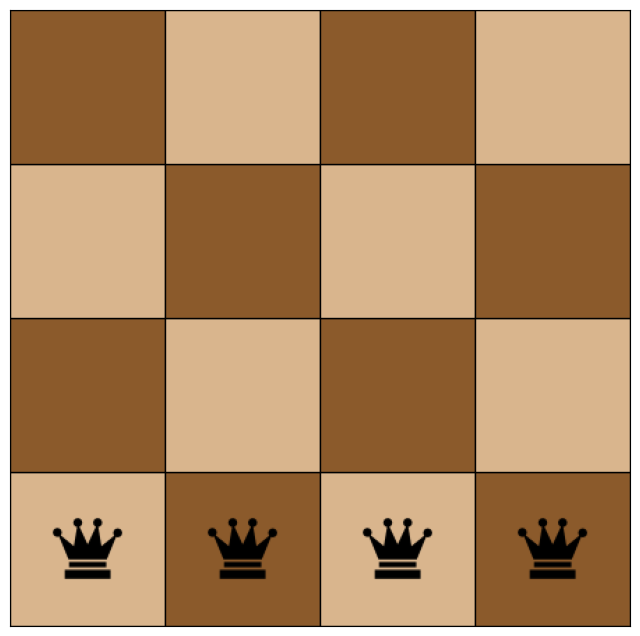

In [7]:
reinas.visualizar(SATtabla(reinas.r1))

---

## Regla 2

La segunda regla es que no puede haber más de una reina por fila. Es decir, si el número $n$ se encuentra dentro de la casilla $(x,y)$, otro número $u\neq x$ no puede estar dentro de ella. La fórmula lógica que representa esta restricción es la siguiente:

$$\bigwedge_{x\in\ Columnas}\bigwedge_{y\in Filas}\left(ReinaEn(x, y) \implies \neg\left(\bigvee_{u \neq x} ReinaEN(u,y)\right)\right)$$


In [8]:
print(reinas.reglas[1])
print("=======================================")
visualizar_formula(reinas.reglas[1], ReinaEn)

((((((((((((((((Ā>-((āOĂ)Oă))Y(Ą>-((ąOĆ)Oć)))Y(Ĉ>-((ĉOĊ)Oċ)))Y(Č>-((čOĎ)Oď)))Y(ā>-((ĀOĂ)Oă)))Y(ą>-((ĄOĆ)Oć)))Y(ĉ>-((ĈOĊ)Oċ)))Y(č>-((ČOĎ)Oď)))Y(Ă>-((ĀOā)Oă)))Y(Ć>-((ĄOą)Oć)))Y(Ċ>-((ĈOĉ)Oċ)))Y(Ď>-((ČOč)Oď)))Y(ă>-((ĀOā)OĂ)))Y(ć>-((ĄOą)OĆ)))Y(ċ>-((ĈOĉ)OĊ)))Y(ď>-((ČOč)OĎ)))


'(((((((((((((((( Hay una reina en la casilla (0,0) >  no (( Hay una reina en la casilla (1,0) O  Hay una reina en la casilla (2,0)) O  Hay una reina en la casilla (3,0))) Y ( Hay una reina en la casilla (0,1) >  no (( Hay una reina en la casilla (1,1) O  Hay una reina en la casilla (2,1)) O  Hay una reina en la casilla (3,1)))) Y ( Hay una reina en la casilla (0,2) >  no (( Hay una reina en la casilla (1,2) O  Hay una reina en la casilla (2,2)) O  Hay una reina en la casilla (3,2)))) Y ( Hay una reina en la casilla (0,3) >  no (( Hay una reina en la casilla (1,3) O  Hay una reina en la casilla (2,3)) O  Hay una reina en la casilla (3,3)))) Y ( Hay una reina en la casilla (1,0) >  no (( Hay una reina en la casilla (0,0) O  Hay una reina en la casilla (2,0)) O  Hay una reina en la casilla (3,0)))) Y ( Hay una reina en la casilla (1,1) >  no (( Hay una reina en la casilla (0,1) O  Hay una reina en la casilla (2,1)) O  Hay una reina en la casilla (3,1)))) Y ( Hay una reina en la casilla (

Function 'SATtabla' executed in 0.8302607536315917968750000000000000000000000000000000000000000000000000000000000000000000000000000000s
 Hay una reina en la casilla (0,0)
 Hay una reina en la casilla (0,1)
 Hay una reina en la casilla (0,2)
 Hay una reina en la casilla (0,3)


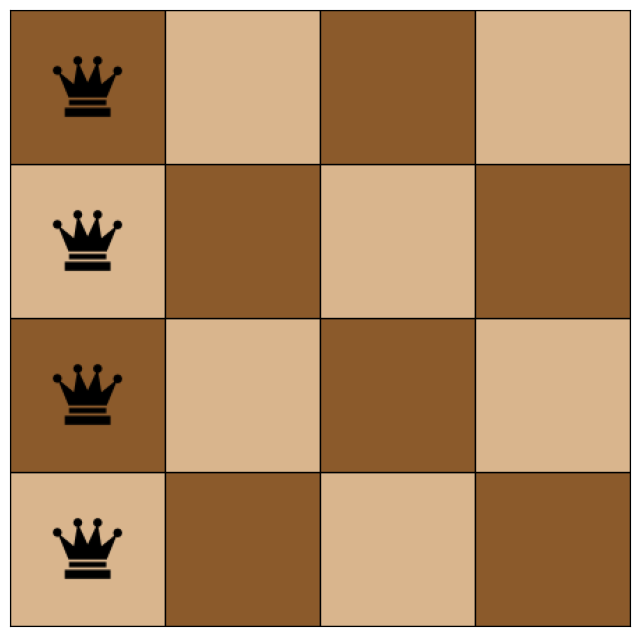

In [9]:
reinas.visualizar(SATtabla(reinas.r2))

---

## Regla 3

La tercera regla consiste en que no puede haber más de una reina por diagonal. 

Primero notese que si tenemos dos reinas en $(x,y)$ , $(x_2, y_2)$:

Las reinas estan en la misma diagonal $\iff |x-x_2| = |y-y_2|$

Ahora definamos el conjunto Diagonal(x,y) como:

$$
    Diagonal(x,y) = \{(a,b) : |x-a| = |y-b| \forall{(a,b) \in {Columnas \times Filas}}\}
$$

La fórmula lógica que representa esta restricción es la siguiente:

$$
    \bigwedge_{x \in Columnas} \bigwedge_{y \in Filas} \left(
        ReinaEn(x,y) \implies \neg \left(
            \bigvee_{(x_2, y_2) \in Diagonal(x,y)} (ReinaEn(x_2,y_2)) 
        \right)
    \right)
$$


---

In [10]:
print(reinas.reglas[2])
print("=======================================")
visualizar_formula(reinas.reglas[2], ReinaEn)

((((((((((((((((Ā>-((ąOĊ)Oď))Y(Ą>-((āOĉ)OĎ)))Y(Ĉ>-((ąOč)OĂ)))Y(Č>-((ĉOĆ)Oă)))Y(ā>-((ĄOĆ)Oċ)))Y(ą>-((((ĀOĈ)OĂ)OĊ)Oď)))Y(ĉ>-((((ĄOČ)OĆ)OĎ)Oă)))Y(č>-((ĈOĊ)Oć)))Y(Ă>-((ĈOą)Oć)))Y(Ć>-((((ČOā)Oĉ)Oă)Oċ)))Y(Ċ>-((((ĀOą)Oč)Oć)Oď)))Y(Ď>-((ĄOĉ)Oċ)))Y(ă>-((ČOĉ)OĆ)))Y(ć>-((čOĂ)OĊ)))Y(ċ>-((āOĆ)OĎ)))Y(ď>-((ĀOą)OĊ)))


'(((((((((((((((( Hay una reina en la casilla (0,0) >  no (( Hay una reina en la casilla (1,1) O  Hay una reina en la casilla (2,2)) O  Hay una reina en la casilla (3,3))) Y ( Hay una reina en la casilla (0,1) >  no (( Hay una reina en la casilla (1,0) O  Hay una reina en la casilla (1,2)) O  Hay una reina en la casilla (2,3)))) Y ( Hay una reina en la casilla (0,2) >  no (( Hay una reina en la casilla (1,1) O  Hay una reina en la casilla (1,3)) O  Hay una reina en la casilla (2,0)))) Y ( Hay una reina en la casilla (0,3) >  no (( Hay una reina en la casilla (1,2) O  Hay una reina en la casilla (2,1)) O  Hay una reina en la casilla (3,0)))) Y ( Hay una reina en la casilla (1,0) >  no (( Hay una reina en la casilla (0,1) O  Hay una reina en la casilla (2,1)) O  Hay una reina en la casilla (3,2)))) Y ( Hay una reina en la casilla (1,1) >  no (((( Hay una reina en la casilla (0,0) O  Hay una reina en la casilla (0,2)) O  Hay una reina en la casilla (2,0)) O  Hay una reina en la casilla (2

Function 'SATtabla' executed in 0.1339850425720214843750000000000000000000000000000000000000000000000000000000000000000000000000000000s
 Hay una reina en la casilla (0,0)
 Hay una reina en la casilla (1,0)
 Hay una reina en la casilla (2,0)
 Hay una reina en la casilla (3,0)
 Hay una reina en la casilla (1,3)
 Hay una reina en la casilla (2,3)


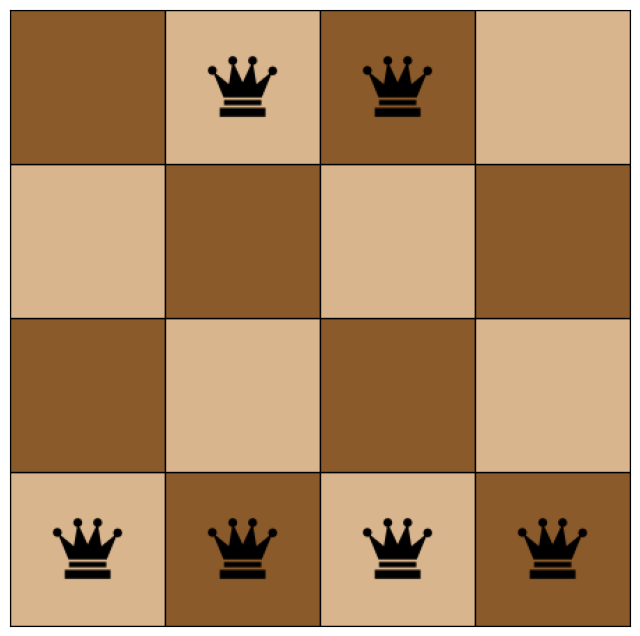

In [11]:
reinas.visualizar(SATtabla(reinas.r3))

---

## Regla 4

**Tienen que haber $n$ reinas.**

Para esto tenemos que garantizar que existen $n$ $x$'s y $n$ $y$'s diferentes de tal manera que haya una reina en esa posicion (es decir $ReinaEn(x,y)$) y que no haya ninguna otra reina en una posicion diferente a las n reinas anteriormente mencionadas.

Como no sabemos el numero de $O-torias$ que vamos a representar vamos a usar esta notacion para decir "$n$ $O-torias$ desde 0 hasta n-1"

$$
\left. \bigvee_{x_{i} \in Columnas} \right|_{0}^{n-1}
$$

<p style="text-align:center"> De tal manera que </p> 

$$
\left. \bigvee_{x_{i} \in Columnas} \right|_{0}^{2} = \bigvee_{x_{0} \in Columnas} \bigvee_{x_{1} \in Columnas - \{x_0\}} \bigvee_{x_{2} \in Columnas - \{x_0,x_1\}}
$$

<p style="text-align:center"> Garantizar que existen n x's y n y's diferentes de tal manera que haya una reina en esa posicion </p> 

$$
\left. \bigvee_{x_{i} \in Columnas} \right|_{0}^{n-1} \left. \bigvee_{y_{i} \in Filas} \right|_{0}^{n-1} \left(
    \bigwedge_{} ReinaEn(x_i,y_i)
\right)
$$


<p style="text-align:center"> No haya ninguna otra reina en una posicion diferente a las n reinas anterior </p>

$$
\neg \left(
    \bigvee_{u \neq x_i} \bigvee_{v \neq y_i} \left(
    ReinaEn(u,v)
\right)
\right)
$$

<p style="text-align:center"> Ahora, juntamos todo </p>

$$
\left. \bigvee_{x_{i} \in Columnas} \right|_{0}^{n-1} \left. \bigvee_{y_{i} \in Filas} \right|_{0}^{n-1} \left(
    \bigwedge_{} ReinaEn(x_i,y_i)
\right) \land \neg \left(
    \bigvee_{u \neq x_i} \bigvee_{v \neq y_i} \left(
    ReinaEn(u,v)
\right)
\right)
$$



In [12]:
print(reinas.reglas[3])
print("=======================================")
visualizar_formula(reinas.reglas[3], ReinaEn)


((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((

'(((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((

Function 'SATtabla' executed in 0.0269982814788818359375000000000000000000000000000000000000000000000000000000000000000000000000000000s
 Hay una reina en la casilla (0,0)
 Hay una reina en la casilla (1,0)
 Hay una reina en la casilla (2,0)
 Hay una reina en la casilla (3,0)
 Hay una reina en la casilla (0,1)
 Hay una reina en la casilla (1,1)
 Hay una reina en la casilla (2,1)
 Hay una reina en la casilla (3,1)
 Hay una reina en la casilla (0,2)
 Hay una reina en la casilla (1,2)
 Hay una reina en la casilla (2,2)
 Hay una reina en la casilla (3,2)
 Hay una reina en la casilla (0,3)
 Hay una reina en la casilla (1,3)
 Hay una reina en la casilla (2,3)
 Hay una reina en la casilla (3,3)


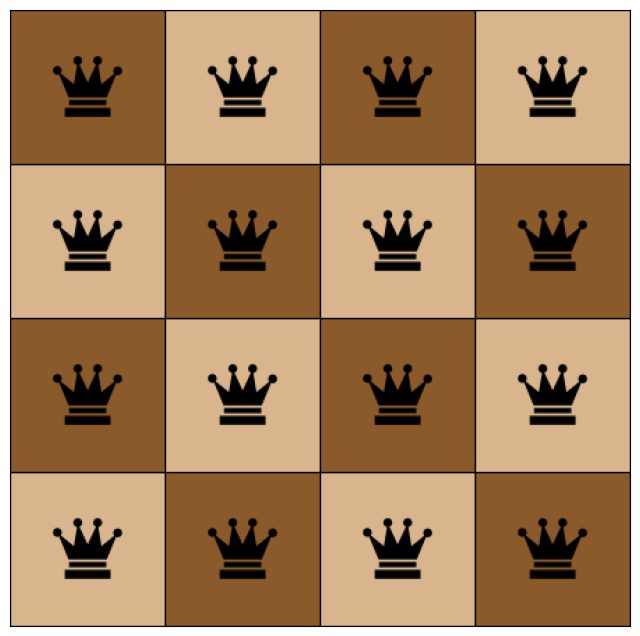

In [13]:
reinas.visualizar(SATtabla(reinas.r4))

## Todas las reglas

Function 'SATtabla' executed in 111.0040733814239501953125000000000000000000000000000000000000000000000000000000000000000000000000000000s
 Hay una reina en la casilla (1,0)
 Hay una reina en la casilla (3,1)
 Hay una reina en la casilla (0,2)
 Hay una reina en la casilla (2,3)


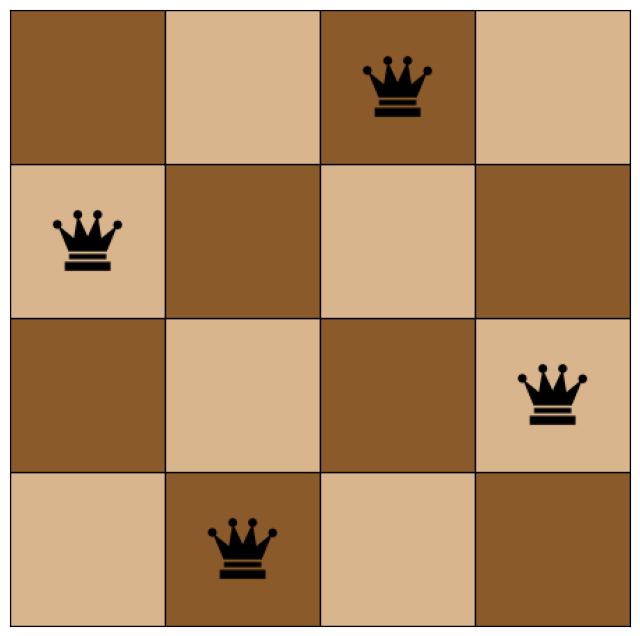

In [14]:
reinas.visualizar(SATtabla(reinas.build_all_rules()))

In [15]:
super_important_function_that_every_project_needs()


  ／l、             
（ﾟ､ ｡ ７         
  l  ~ヽ       
  じしf_,)ノ        

